# Big Project: Fantasy Premier League (FPL) Points Predictor
## Data Rules Everything Around Me (DREAM) TEAM - Fall 2024 - CME 538
## Feras Abdulla - Maha Fakhroo - Syed Shahid Hossaini - Eric Guan
-----------------------------------------------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis (EDA) and Visualizations
-----------------------------------------------------------------------------------------------------------------------------------------------


Below, the different columns available in the database are listed and explained:

1) `'name'`: Name of player
2) `'position'`: Position on the pitch (Goalkeeper, Defender, Midfielder, Forward)
3) `'team'`: Premier League team with which the player is affiliated
4) `'xP'`: Expected points for a the player in the given fixture
5) `'assists'`: Actual number of assists
6) `'bonus'`: Actual number of bonus points awarded
7) `'bps'`: Stands for 'Bonus Points System', a raw score based on performance metrics like goals, assists, clean sheets, saves, tackles, and other contributions that is used to rank players and determine `'bonus'` scores.
8) `'clean_sheets'`: Boolean column identifying whether the player earned points for a clean sheet (i.e., his team conceded zero goals while he was on the pitch).
9) `'creativity'`: A measure of a player’s potential to create scoring opportunities (passes, crosses, etc.).
10) `'element'`: A unique ID for the player in the FPL system.
11) `'fixture'`: The ID of the match the player participated in.
12) `'goals_conceded'`: The number of goals the player's team conceded while they were on the pitch.
13) `'goals_scored'`: The number of goals scored by the player.
14) `'Influence_Creativity_Threat_Index'`: A combined metric summarizing the player's influence, creativity, and threat.
15) `'influence'`: A measure of a player’s impact on a match (defensive and offensive contributions).
16) `'kickoff_time'`: The start time of the match.
17) `'minutes'`: The number of minutes the player was on the pitch during the match.
18) `'opponent_team'`: The ID of the opposing team in the fixture.
19) `'own_goals'`: The number of own goals scored by the player.
20) `'penalties_missed'`: The number of penalty kicks missed by the player.
21) `'penalties_saved'`: The number of penalty kicks saved by the player (goalkeepers only).
22) `'red_cards'`: The number of red cards received by the player.
23) `'round'`: The fantasy round number of the match.
24) `'saves'`: The number of saves made by the player (goalkeepers only).
25) `'selected'`: The number of FPL managers who selected the player for their teams in this round.
26) `'team_a_score'`: The number of goals scored by the away team in the match.
27) `'team_h_score'`: The number of goals scored by the home team in the match.
28) `'threat'`: A measure of a player’s likelihood of scoring goals based on their attacking actions.
29) `'total_points'`: The total FPL points earned by the player in the match. `This column will be our label`.
30) `'transfers_balance'`: The net number of transfers for the player (transfers in minus transfers out).
31) `'transfers_in'`: The number of FPL teams that transferred the player in before this match.
32) `'transfers_out'`: The number of FPL teams that transferred the player out before this match.
33) `'value'`: The player’s price in FPL (in millions GBP).
34) `'was_home'`: A boolean indicating if the player's team was playing at home (True/1 = home, False/0 = away).
35) `'yellow_cards'`: The number of yellow cards received by the player.
36) `'GW'`: The specific gameweek for the match.
37) `'expected_goals'`: A metric predicting the likelihood of the player scoring based on their chances.
38) `'expected_assists'`: A metric predicting the likelihood of the player assisting a goal.
39) `'expected_goal_involvements'`: The sum of `'expected_goals'` and `'expected_assists'`, representing the player’s total expected goal contributions.

### Import Packages
Imports essential Python libraries and machine learning tools for data analysis, visualization, and model evaluation, as well as functions for splitting data into training and testing sets. These are typically used in machine learning projects to build and assess predictive models.

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import ast
import unicodedata

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import Data
Let's start by importing the `'master.csv'` file into a dataframe.

In [48]:
master = pd.read_csv('../master.csv')
master.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,expected_goals,expected_assists,expected_goal_involvements
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,0,0,0,55,True,0,1,0.392763,0.000000,0.392763
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,0,0,0,50,True,0,1,0.000000,0.000000,0.000000
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,...,0,0,0,50,True,0,1,NaN,NaN,NaN
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,0,0,0,50,True,0,1,0.000000,0.000000,0.000000
4,Abdoulaye DoucourA©,MID,Everton,1.3,0,0,20,1,44.6,512,...,0,0,0,55,False,0,1,0.000000,0.205708,0.205708


In [49]:
master.shape

(111920, 39)

In [50]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111920 entries, 0 to 111919
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   name                               111920 non-null  object 
 1   position                           111920 non-null  object 
 2   team                               111920 non-null  object 
 3   xP                                 111920 non-null  float64
 4   assists                            111920 non-null  int64  
 5   bonus                              111920 non-null  int64  
 6   bps                                111920 non-null  int64  
 7   clean_sheets                       111920 non-null  int64  
 8   creativity                         111920 non-null  float64
 9   element                            111920 non-null  int64  
 10  fixture                            111920 non-null  int64  
 11  goals_conceded                     1119

## Data Cleaning

First, let's explore how many missing values exist in the master dataframe:

In [51]:
# Determine missing values for each column
missing_values = master.isnull().sum()

# Create a df of missing values
missing_df = pd.DataFrame({'Missing Values': missing_values})

missing_df

,Missing Values
name,0
position,0
team,0
xP,0
assists,0
bonus,0
bps,0
clean_sheets,0
creativity,0
element,0


So, we see that our efforts to impute/drop missing values will have to focus on three main features: `'expected_goals'`, `'expected_assists'`, and `'expected_goal_involvements'`. Let's go ahead and drop the NaN values, because our large data set will remain substantial to explore and train an ML model even after dropping the missing values.

In [52]:
master = master.dropna()
master.shape

(79272, 39)

Let's also examine the columns that contain categorical data, including how many unique values each contains and what those unique values are. 

In [53]:
# Define categorical columns
categorical_columns = ['position', 'team']

# Calculate how many unique values there are for each categorical column
unique_vals = master[categorical_columns].nunique()
print("Unique values in categorical features:")
print(unique_vals)

# Print different categorical values
for i in categorical_columns:
    print(f"\nUnique values in '{i}':")
    print(master[i].unique())

Unique values in categorical features:
position     5
team        27
dtype: int64

Unique values in 'position':
['FWD' 'DEF' 'GK' 'MID' 'GKP']

Unique values in 'team':
['Brighton' 'West Ham' 'Sheffield Utd' 'Everton' 'Fulham' 'Wolves'
 'Arsenal' 'Southampton' 'Newcastle' 'Chelsea' 'Liverpool'
 'Crystal Palace' 'Leicester' 'Spurs' 'West Brom' 'Leeds' 'Man Utd'
 'Burnley' 'Man City' 'Aston Villa' 'Watford' 'Norwich' 'Brentford'
 'Bournemouth' "Nott'm Forest" 'Luton' 'Ipswich']


As we can see, there are 5 unique player positions: `'FWD'` = Forward, `'DEF'` = Defender, `'MID'` = Midfielder, and `'GK/GKP'` = Goalkeeper. Both GK and GKP refer to the same position but are written differently due to different syntax formats across different seasons, so we will have to align them into one value: `'GK'`. We will also change the abbreviated name of Nottingham Forest in the team column, `'Nott'm Forest'`, to the full name: `'Nottingham Forest'`.

In [54]:
master['position'] = master['position'].replace('GKP', 'GK') # GKP --> GK
master['team'] = master['team'].replace("Nott'm Forest", "Nottingham Forest") # Nott'm Forest --> Nottingham Forest

# Calculate how many unique values there are for each categorical column
unique_vals = master[categorical_columns].nunique()
print("Unique values in categorical features:")
print(unique_vals)

# Print different categorical values
for i in categorical_columns:
    print(f"\nUnique values in '{i}':")
    print(master[i].unique())

Unique values in categorical features:
position     4
team        27
dtype: int64

Unique values in 'position':
['FWD' 'DEF' 'GK' 'MID']

Unique values in 'team':
['Brighton' 'West Ham' 'Sheffield Utd' 'Everton' 'Fulham' 'Wolves'
 'Arsenal' 'Southampton' 'Newcastle' 'Chelsea' 'Liverpool'
 'Crystal Palace' 'Leicester' 'Spurs' 'West Brom' 'Leeds' 'Man Utd'
 'Burnley' 'Man City' 'Aston Villa' 'Watford' 'Norwich' 'Brentford'
 'Bournemouth' 'Nottingham Forest' 'Luton' 'Ipswich']


Let's also examine the data for the presence of duplicate rows.

In [55]:
print(f"Number of duplicate rows in the master data set: {master.duplicated().sum()}")

Number of duplicate rows in the master data set: 0


Nice, no duplicates!


Now, we should filter the `'name'` column to remove any symbols/non-alphabetical characters, to decode the text into normal alphabet format.

In [56]:
def remove_accents(df):
    ''' Replace recurring symbols with their accent-less alphanumeric counterparts '''
    df['name'] = df['name'].str.replace('A©', 'e', regex=False)
    df['name'] = df['name'].str.replace('A§', 'c', regex=False)
    df['name'] = df['name'].str.replace('A­', 'i', regex=False)
    df['name'] = df['name'].str.replace('A3', 'o', regex=False)
    df['name'] = df['name'].str.replace('A¶', 'o', regex=False)
    df['name'] = df['name'].str.replace('A1⁄4', 'u', regex=False)
    df['name'] = df['name'].str.replace('A¤', 'a', regex=False)
    df['name'] = df['name'].str.replace('A«', 'e', regex=False)
    df['name'] = df['name'].str.replace('A£', 'a', regex=False)

    ''' Deal with specific outlier names '''
    df['name'] = df['name'].str.replace('FernA¡ndez', 'Fernandez', regex=False)
    df['name'] = df['name'].str.replace('Marek RodA¡k', 'Marek Rodak', regex=False)
    df['name'] = df['name'].str.replace('GroA', 'Groß', regex=False)
    df['name'] = df['name'].str.replace('Davinson SA¡nchez', 'Davinson Sanchez', regex=False)
    df['name'] = df['name'].str.replace('Cengiz Ander', 'Cengiz Under', regex=False)
    df['name'] = df['name'].str.replace('FabiA¡n Balbuena', 'Fabian Balbuena', regex=False)
    df['name'] = df['name'].str.replace('Robert SA¡nchez', 'Robert Sanchez', regex=False)
    df['name'] = df['name'].str.replace('SaAol Aiguez', 'Saul Niguez', regex=False)
    df['name'] = df['name'].str.replace('Alvaro', 'Alvaro', regex=False)
    df['name'] = df['name'].str.replace('Kanté', 'Kante', regex=False)

    return df

master = remove_accents(master)


Now let us convert the `'kickoff_time'` column into datetime format, extract the `'Hour'`, `'DayOfWeek'`, `'Month'`, `'Weekend'`, and `'WeekOfYear'` elements, and store them into new columns in the `'master'` df.

In [57]:
master['kickoff_time'] = pd.to_datetime(master['kickoff_time'])

master['Hour'] = master['kickoff_time'].dt.hour # Extract hour
master['DayOfWeek'] = master['kickoff_time'].dt.dayofweek # Extract day of week (Monday = 0 to Sunday = 6)
master['Weekend'] = master['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0) # Determine if weekend (1 if yes, 0 if no)
master['WeekOfYear'] = master['kickoff_time'].dt.isocalendar().week # Extract week of year
master['Month'] = master['kickoff_time'].dt.month # Extract month
master['Year'] = master['kickoff_time'].dt.year # Extract year

master.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,GW,expected_goals,expected_assists,expected_goal_involvements,Hour,DayOfWeek,Weekend,WeekOfYear,Month,Year
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,1,0.392763,0.000000,0.392763,19,0,0,38,9,2020
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,1,0.000000,0.000000,0.000000,19,5,1,37,9,2020
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,1,0.000000,0.000000,0.000000,17,0,0,38,9,2020
4,Abdoulaye Doucoure,MID,Everton,1.3,0,0,20,1,44.6,512,...,1,0.000000,0.205708,0.205708,15,6,1,37,9,2020
5,Aboubakar Kamara,MID,Fulham,0.4,0,0,-2,0,1.8,190,...,1,0.020672,0.000000,0.020672,11,5,1,37,9,2020


Now, to encode the categorical features. We will one-hot encode the `'position'` column, since there are only 4 unique values. However, we will label-encode the `'team'` column and create a new column: `'team_label'`. We do this because we have 27 unique teams in the database, and one-hot encoding `'team'` would increase dimensionality substantially. Furthermore, our ML model will be a Random Forest, which does not infer ordinality, so label encoding will not be an issue.

In [58]:
# One-hot encode the 'position' column while retaining the original column
position_dummies = pd.get_dummies(master['position'], prefix='position')
master = pd.concat([master, position_dummies], axis=1)

# Label encode the 'team' column while retaining the original column
le = LabelEncoder()
master['team_label'] = le.fit_transform(master['team'])

master.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,DayOfWeek,Weekend,WeekOfYear,Month,Year,position_DEF,position_FWD,position_GK,position_MID,team_label
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,0,0,38,9,2020,False,True,False,False,4
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,5,1,37,9,2020,True,False,False,False,25
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,0,0,38,9,2020,False,False,True,False,20
4,Abdoulaye Doucoure,MID,Everton,1.3,0,0,20,1,44.6,512,...,6,1,37,9,2020,False,False,False,True,8
5,Aboubakar Kamara,MID,Fulham,0.4,0,0,-2,0,1.8,190,...,5,1,37,9,2020,False,False,False,True,9


Now, we will filter out rows where the number of minutes played, `'minutes'`, is zero. The original `'master'` dataframe includes all players in a season, including those who are listed in a team's squad but do not play (those on the bench).  

In [59]:
master = master[master['minutes'] > 0]

print('Length of master dataframe after filtering out players with 0 minutes of play:', master.shape)

Length of master dataframe after filtering out players with 0 minutes of play: (42529, 50)


As we can see, a large portion of the database (36,743 rows or 46.3%) represented players who were not active in a given fixture. By filtering these out, we can focus on players with concrete contributions when creating visualizations and designing our model.

Now, let us examine invalid occurrences of expected goal metrics. If a player's `'goals_scored'` are greater than zero, then that row's `'expected_goals'` cannot be zero. Therefore, we need to examine the dataframe for those conditions and filter them out.

In [60]:
# Filter rows where goals_scored > 0 and expected_goals == 0
invalid_rows = master[(master['goals_scored'] > 0) & (master['expected_goals'] == 0)]

# Count how many times this happens
invalid_count = len(invalid_rows)

print(f"Number of rows where goals_scored > 0 but expected_goals = 0: {invalid_count}")

Number of rows where goals_scored > 0 but expected_goals = 0: 327


In [61]:
# Drop rows where goals_scored > 0 and expected_goals == 0
master = master[~((master['goals_scored'] > 0) & (master['expected_goals'] == 0))]

print('Length of master dataframe after filtering out rows where goals >0 but expected goals = 0:', master.shape)

Length of master dataframe after filtering out rows where goals >0 but expected goals = 0: (42202, 50)


The number of rows where goals were scored but expected goals were zero are relatively few (327) and have now been filtered out.

We should also filter out rows with limited `'minutes'` of gameplay, because they tend to have incomplete or missing data. They may also bias our model and analysis by including late-game strategies (i.e., some managers might substitute a player in at the end of a game where his team is leading to increase defensive posture and maintain their lead). However, in order to avoid favoring early starters, we need to strike a balance in choosing the `'minutes'` threshold.

We will proceed by filtering out players with less than 5 minutes of gameplay.

In [62]:
master = master[master['minutes'] >= 5]

print('Length of master daraframe after filtering out rows with less than 5 minutes of gameplay: ', master.shape)

Length of master daraframe after filtering out rows with less than 5 minutes of gameplay:  (40462, 50)


So, 1740 rows have been filtered out.

Now, we need to check for negative values

In [63]:
for column in master.columns:
    # Check if the column is numeric
    if master[column].dtype in ['int64', 'float64']:
        # Filter rows with negative values
        negatives = master[master[column] < 0]
        if not negatives.empty:
            print(f"Negative values found in column '{column}':")
            print(len(negatives))
            print("\n")

Negative values found in column 'xP':
1590


Negative values found in column 'bps':
1440


Negative values found in column 'total_points':
491


Negative values found in column 'transfers_balance':
20529




`'total_points'`, `'bps'`, and `'transfers_balance'` can have negative values. Players can be penalized for events like own goals, red cards, and goals conceded, so those negatives can and should be retained. In addition, `'transfers_balance'` is a net figure that represents transfers in minus transfers out, so no issue with negatives here either.

However, `'xP'` values are generally non-negative because they are probabilities multiplied by point weights. Negative xPs can indicate errors in data sourcing. Negative `'xP'` will thus be imputed with the average of that player's xP from the gameweeks before and after the negative value. Care will be taken so that there is no jumping between seasons, since the `'master'` dataframe is a concatenation of several seasons. If adjacent xPs for that same player are also negative, it will be replaced with the closest neighbor.

In [64]:
# Replace negative xP values with NaN
master.loc[master['xP'] < 0, 'xP'] = np.nan

# Function to impute xP
def impute_xp(df):
    # Iterate through each player's data
    for name, group in df.groupby('name'):
        # Loop through rows with NaN in xP
        for idx in group[group['xP'].isna()].index:
            current_gw = df.loc[idx, 'GW']

            # Check for previous and next GWs in the same season
            previous_idx = group[
                (group['GW'] < current_gw) & (~group['xP'].isna())
            ].index.max()
            next_idx = group[
                (group['GW'] > current_gw) & (~group['xP'].isna())
            ].index.min()

            if pd.notna(previous_idx) and pd.notna(next_idx):
                # Average of the previous and next valid xP values
                df.loc[idx, 'xP'] = (df.loc[previous_idx, 'xP'] + df.loc[next_idx, 'xP']) / 2
            elif pd.notna(previous_idx):
                # Use the previous valid xP value
                df.loc[idx, 'xP'] = df.loc[previous_idx, 'xP']
            elif pd.notna(next_idx):
                # Use the next valid xP value
                df.loc[idx, 'xP'] = df.loc[next_idx, 'xP']
            else:
                # Fallback: Use the closest available xP value
                neighbor_idx = group[~group['xP'].isna()].index.min()
                if pd.notna(neighbor_idx):
                    df.loc[idx, 'xP'] = df.loc[neighbor_idx, 'xP']
    return df

# Apply the imputation function
master = impute_xp(master)

# Verify the result
print(len(master[master['xP'].isna()]))  # Should be empty if all NaNs are imputed

29


The remaining NaNs are likely due to zero applicable values to impute with, based on our imputation conditions. Therefore, let's go ahead and drop these 29 rows.

In [65]:
print(master.shape)
master = master.dropna()
print(master.shape)

(40462, 50)
(40433, 50)


Now, finally, let's go ahead and save a cleaned master file to CSV format.

In [66]:
master.to_csv('../master_cleaned.csv', index=False)

## Visualizations

First, let's import the cleaned/filtered data into a new dataframe called `'master_cleaned'`

In [67]:
master_cleaned = pd.read_csv('../master_cleaned.csv')
master_cleaned.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,DayOfWeek,Weekend,WeekOfYear,Month,Year,position_DEF,position_FWD,position_GK,position_MID,team_label
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,0,0,38,9,2020,False,True,False,False,4
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,5,1,37,9,2020,True,False,False,False,25
2,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,0,0,38,9,2020,False,False,True,False,20
3,Abdoulaye Doucoure,MID,Everton,1.3,0,0,20,1,44.6,512,...,6,1,37,9,2020,False,False,False,True,8
4,Aboubakar Kamara,MID,Fulham,0.4,0,0,-2,0,1.8,190,...,5,1,37,9,2020,False,False,False,True,9


Story: What makes Premier League performance intriguing? Why should we care about metrics like total points, home vs. away trends, and penalty impacts? By understanding these, we can better evaluate players’ consistency, impact, and potential.

# Step 1: Overview of Player Performance Metrics

Total points is an important metric to evaluate player performance as it aggregates key contributions such as goals, assists, clean sheets, and bonus points. The following trends gives an overview of this.

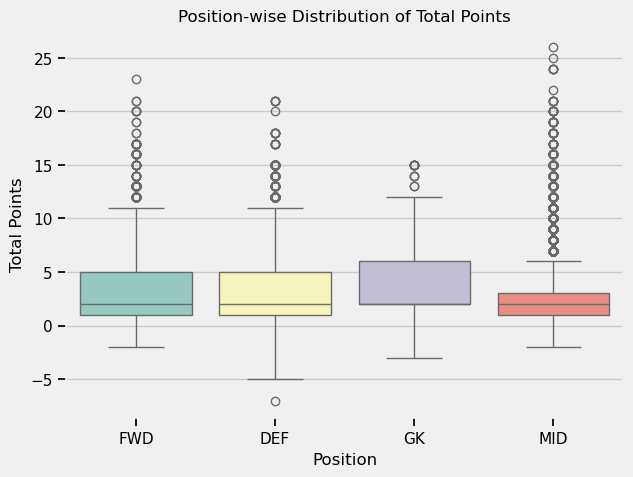

In [69]:
# Position-wise performance

sns.boxplot(x='position', y='total_points', data=master_cleaned, palette='Set3')
plt.title("Position-wise Distribution of Total Points")
plt.xlabel("Position")
plt.ylabel("Total Points")
plt.show()

This plot reveals the spread and consistency of points scored by players in different positions. The results showcase the variability within each position. 

Midfielders (MID) demonstrate the widest spread of points and the highest potential for top performance (indicated by outliers).
Defenders (DEF) and Goalkeepers (GK) have tighter distributions, reflecting more consistent, yet limited scoring opportunities.
Forwards (FWD) cluster near the median but with occasional high outliers due to exceptional performances.

This distinction makes exploring these metrics pivotal.

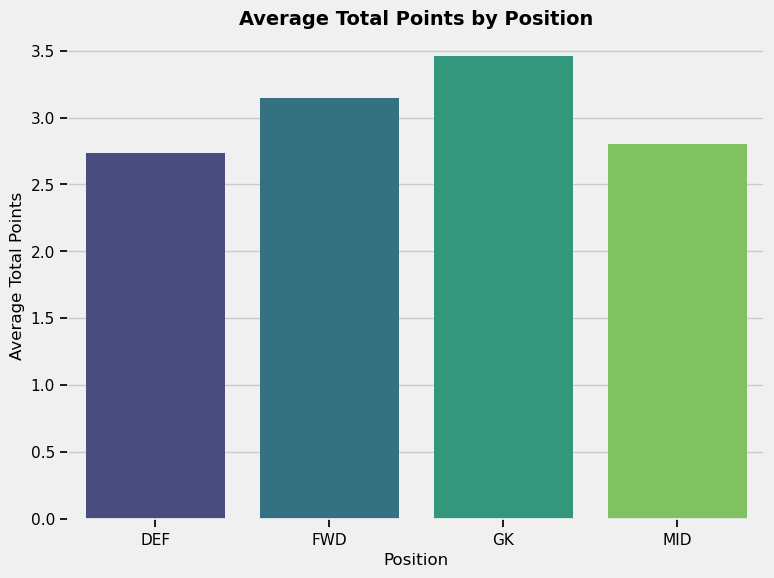

In [70]:
# Group data by position and calculate average total points
avg_points_per_position = master_cleaned.groupby('position')['total_points'].mean().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='position', y='total_points', data=avg_points_per_position, palette='viridis')
plt.title("Average Total Points by Position", fontsize=14, fontweight='bold')
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Total Points", fontsize=12)
plt.show()

This bar chart provides the average total points scored by players in each position (DEF, FWD, GK, MID). Goalkeepers (GK) score the highest average points among positions, likely due to consistent points from saves and clean sheets. Forwards (FWD) follow closely, as their scoring relies heavily on goals and assists. Defenders (DEF) and Midfielders (MID) show relatively lower average points, though MID often contributes to goals and assists as well.

The bar chart is good for quick comparisons of average performance across positions, ideal for an overview. The box plot complements this by providing a deeper analysis of variability and extremes, useful for identifying positions with the most variability (e.g., MID). Together, these visuals offer a comprehensive understanding of player performance trends by position.

# Step 2: Key Metric Correlations for Players Performance

The following sections include heatmaps of the key metrics and their importance with regards to the players performance.

# Add Shahids heatmap of variable correlations (colinearity check) here.

Shahid comments about the large heatmap.

The following heatmap is more focused showing the correlations between specific performance-related metrics.

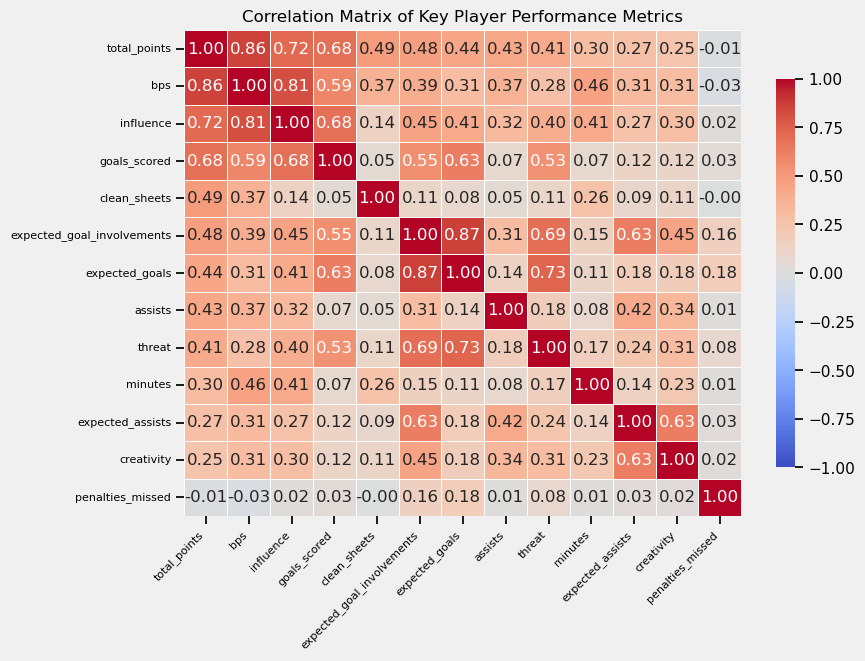

In [71]:
# Filter and reorganize the dataset for relevant features
selected_columns = [
    'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'clean_sheets', 'minutes', 'penalties_missed',
    'influence', 'creativity', 'threat', 'bps'
]
copy = master_cleaned[selected_columns]

# Compute the correlation matrix
correlation_matrix = copy.corr()

# Sort the matrix by correlation with 'total_points'
correlation_matrix = correlation_matrix.sort_values(by='total_points', ascending=False, axis=0)
correlation_matrix = correlation_matrix.sort_values(by='total_points', ascending=False, axis=1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
    vmin=-1, vmax=1, cbar_kws={"shrink": 0.8}, linewidths=0.5
)
plt.title("Correlation Matrix of Key Player Performance Metrics", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The metric 'total_points' has strong correlations with 'bps' (bonus points system), 'goals_scored', and 'influence'. This indicates these are the primary drivers of a player's overall FPL performance.

Metrics like 'penalties_missed' and 'yellow_cards' show little to no correlation with total_points, suggesting they have a minimal impact.

Advanced metrics like 'expected_goal_involvements' and 'expected_goals' show strong relationships with 'goals_scored' and 'total_points', validating their predictive value for future performance.

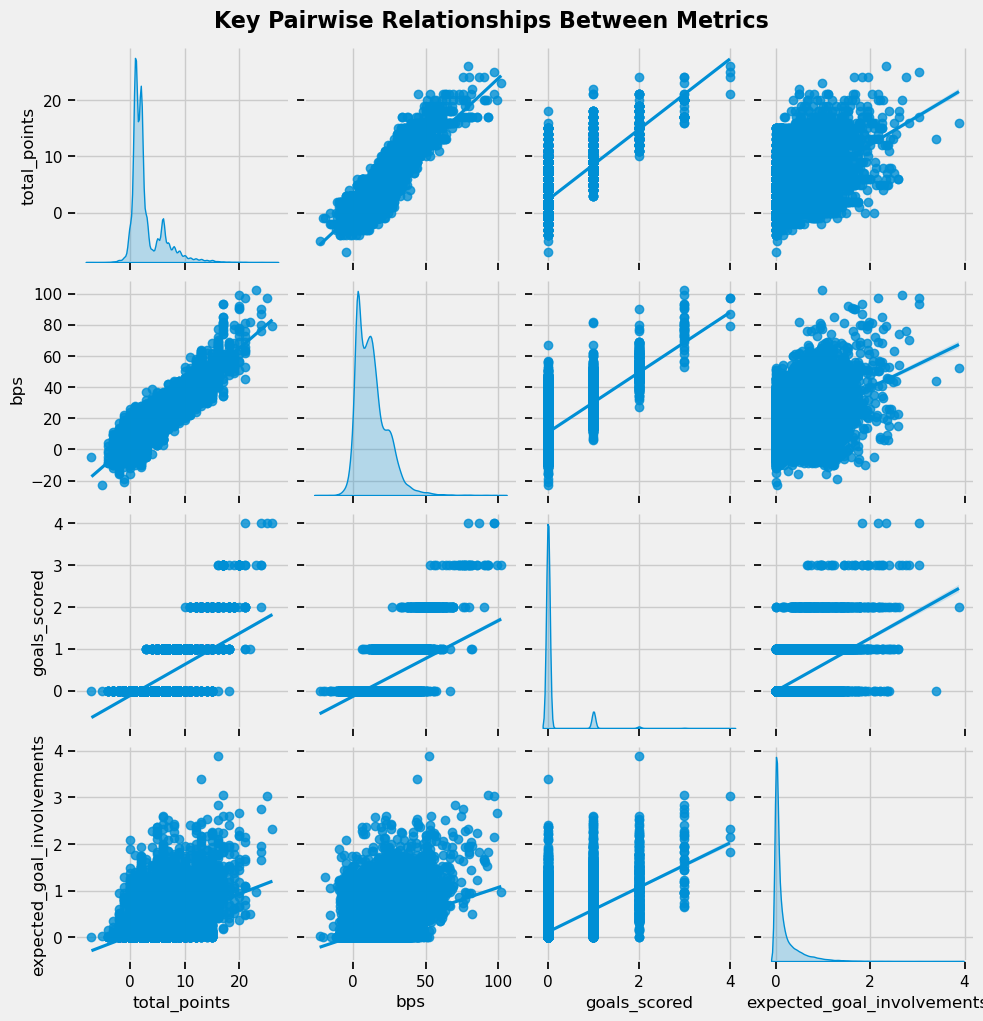

In [72]:
# Select key metrics for pairwise relationships
pairwise_metrics = ['total_points', 'bps', 'goals_scored', 'expected_goal_involvements']
sns.pairplot(master_cleaned[pairwise_metrics], kind='reg', diag_kind='kde', palette='coolwarm')
plt.suptitle("Key Pairwise Relationships Between Metrics", y=1.02, fontsize=16, fontweight='bold')
plt.show()

Insights from the pairwise relationships:
1. Total points and BPS shows a positive linear relationship. BPS is a strong indicator of total points as it reflects a player's overall contribution in a match (tackles, passes, etc.).
2. Total points increase with goals scored, as goals directly contribute to a player's point tally.
3. Total points and expected goal involvments correlation is less linear, as not all points come from goals (e.g. clean sheets or assists also contribute).
4. BPS and expected goal involvments show some positive association, but not as strong as other indicators.
5. Goals Scored and Expected Goal Involvements show a moderate linear correlation. Players who score more tend to have higher xG/xA metrics.

# Add shahids heat map for metric importance by position here

Shahids comments about the heat map by position

# Step 3: Exploring Match-Level Data

Examining home versus away performance and key match metrics reveals the contextual factors influencing player output.

This analysis provides insights into how match location and key game events contribute to total points.

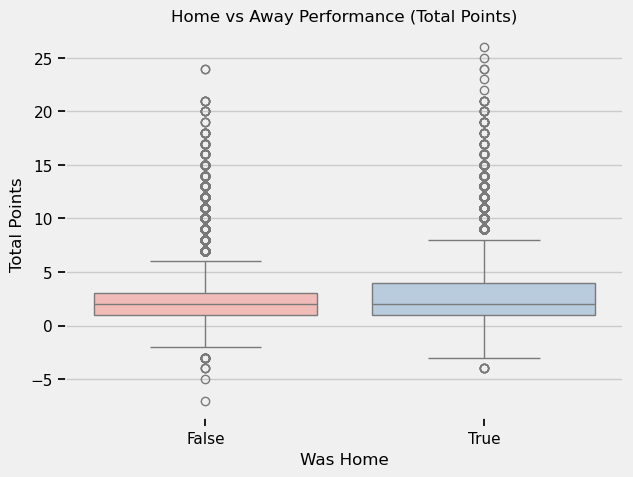

In [73]:
# Home vs Away performance
sns.boxplot(x='was_home', y='total_points', data=master_cleaned, palette='Pastel1')
plt.title("Home vs Away Performance (Total Points)")
plt.xlabel("Was Home")
plt.ylabel("Total Points")
plt.show()

Home advantage is evident from higher average and median points at home. Such insights can influence fantasy team captain choices, particularly for home matches.

Later on, we can see that some players perform better on average at home matches than away and vice versa, which can help make better decisions about players to choose for the FPL.

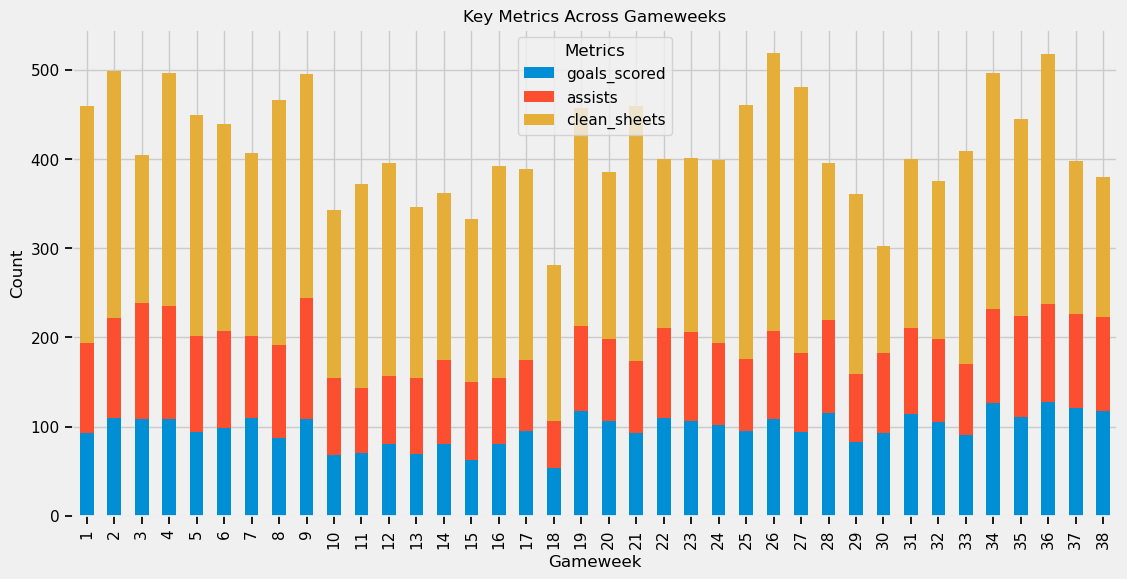

In [74]:
# Key event metrics across gameweeks
gameweek_metrics = master_cleaned.groupby('GW')[['goals_scored', 'assists', 'clean_sheets']].sum()
gameweek_metrics.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Key Metrics Across Gameweeks")
plt.xlabel("Gameweek")
plt.ylabel("Count")
plt.legend(title="Metrics")
plt.show()

Clean sheets are the most consistent contributor, suggesting defenders and goalkeepers with a good clean sheet record are valuable.
The goals_scored metric is the shortest, which indicates that goals are the rarest event in a football match compared to assists or clean sheets.
Fantasy football managers often use gameweek trends to plan their transfers and team strategies.

# Step 4: Expected and Actual Performance Metrics

This step bridges the gap between predicted and realized performance, offering actionable insights for evaluating player reliability.

In [108]:
# Filter top performers based on Aggregated Expected Goals or Actual Goals Scored
top_performers = master_cleaned[
    (master_cleaned['Aggregated Expected Goals'] > 10) | 
    (master_cleaned['Actual Goals Scored'] > 10)
]

# Plotting the scatter plot with hue based on player position
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='Aggregated Expected Goals', 
    y='Actual Goals Scored', 
    hue='Position', 
    data=master_cleaned, 
    edgecolor="w", 
    s=100,
    palette="Set2"
)

# Add a reference line for x = y
max_value = max(master_cleaned['Aggregated Expected Goals'].max(), 
                master_cleaned['Actual Goals Scored'].max())
plt.plot(
    [0, max_value], 
    [0, max_value], 
    'k--', linewidth=1, label="x = y"
)

# Annotate key performers (e.g., top scorers or outliers)
for _, row in top_performers.iterrows():
    plt.text(
        row['Aggregated Expected Goals'], 
        row['Actual Goals Scored'], 
        row['name'],  # Ensure player names are properly labeled
        fontsize=9, 
        alpha=0.9,
        rotation=45
    )

# Add plot enhancements
plt.title("Aggregated Expected Goals vs Actual Goals Scored by Player", fontsize=14, fontweight='bold')
plt.xlabel("Aggregated Expected Goals", fontsize=12)
plt.ylabel("Aggregated Goals Scored", fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(0, master_cleaned['Aggregated Expected Goals'].max() + 5)
plt.ylim(0, master_cleaned['Actual Goals Scored'].max() + 5)
plt.legend(title="Position", fontsize=10)
plt.tight_layout()
plt.show()

KeyError: 'Aggregated Expected Goals'

The names of Haaland and Kane disappeared?

Outliers above the line have significantly outperformed their xG, because of exceptional performances. Below the line are might be  players like defenders or goalkeepers scoring fewer goals 

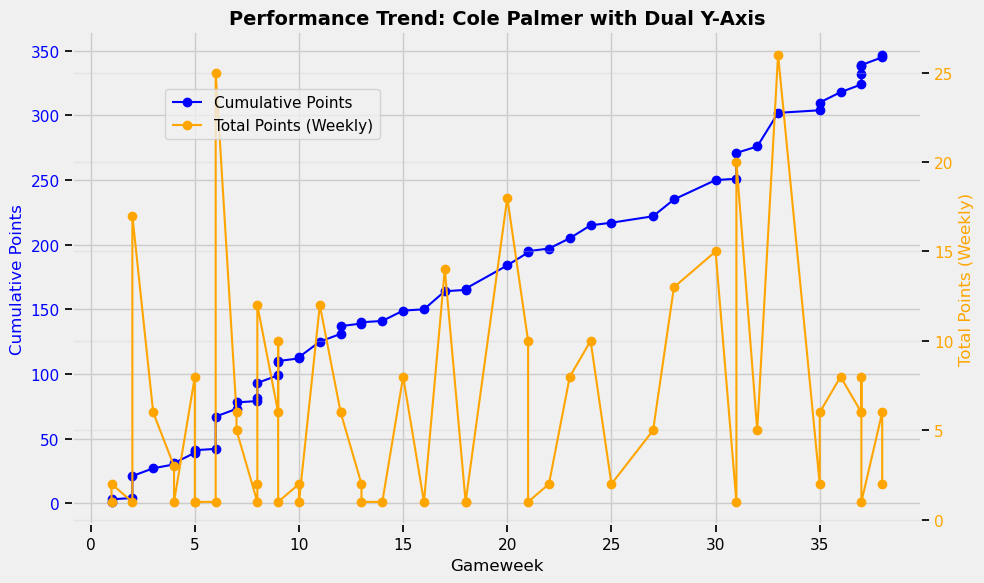

In [91]:
# Filter the data for Cole Palmer
cole_palmer_data = master_cleaned[master_cleaned['name'] == "Cole Palmer"].copy()

# Sort by Gameweek to ensure proper ordering
cole_palmer_data = cole_palmer_data.sort_values(by='GW')

# Calculate cumulative points
cole_palmer_data['cumulative_points'] = cole_palmer_data['total_points'].cumsum()

# Plot cumulative points on the primary y-axis and total points on the secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis for cumulative points
ax1.plot(cole_palmer_data['GW'], cole_palmer_data['cumulative_points'], label="Cumulative Points", color='blue', marker='o')
ax1.set_xlabel("Gameweek", fontsize=12)
ax1.set_ylabel("Cumulative Points", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for total points
ax2 = ax1.twinx()
ax2.plot(cole_palmer_data['GW'], cole_palmer_data['total_points'], label="Total Points (Weekly)", color='orange', marker='o')
ax2.set_ylabel("Total Points (Weekly)", fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title("Performance Trend: Cole Palmer with Dual Y-Axis", fontsize=14, fontweight='bold')
fig.tight_layout()
plt.grid(alpha=0.3)

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
plt.show()

The cumulative points steadily rise, reflecting consistent contributions throughout the season. This is a key indicator of reliability and long-term value as a player. A steady cumulative curve is desirable for managers looking for dependable players, while sharp growth segments indicate breakout performances.
High Variability: The orange line shows sharp peaks and troughs, indicating inconsistency in weekly performances. Some gameweeks, such as Gameweek 6 and Gameweek 30, stand out as peak contributions.

Insights for FPL:
The rising cumulative curve shows that Palmer offers consistent season-long value, despite the week-to-week volatility.
Managers can analyze gameweeks with sharp spikes in the orange line to determine favorable conditions for selecting the player (e.g., easier fixtures).
The combination of steady cumulative points and a few standout gameweeks suggests Palmer may be a strong pick for long-term teams, with bonus potential in favorable fixtures.

# Step 5: Penalty and Red Card Impact

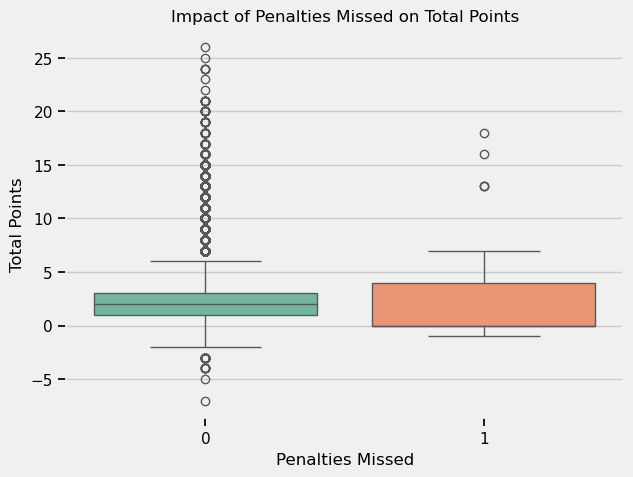

In [77]:
# Analyze penalties missed/saved impact
sns.boxplot(x='penalties_missed', y='total_points', data=master_cleaned, palette='Set2')
plt.title("Impact of Penalties Missed on Total Points")
plt.xlabel("Penalties Missed")
plt.ylabel("Total Points")
plt.show()

Players who missed a penalty (indicated by 1 on the x-axis) generally show a lower median Total Points than players who did not miss a penalty (indicated by 0 on the x-axis).

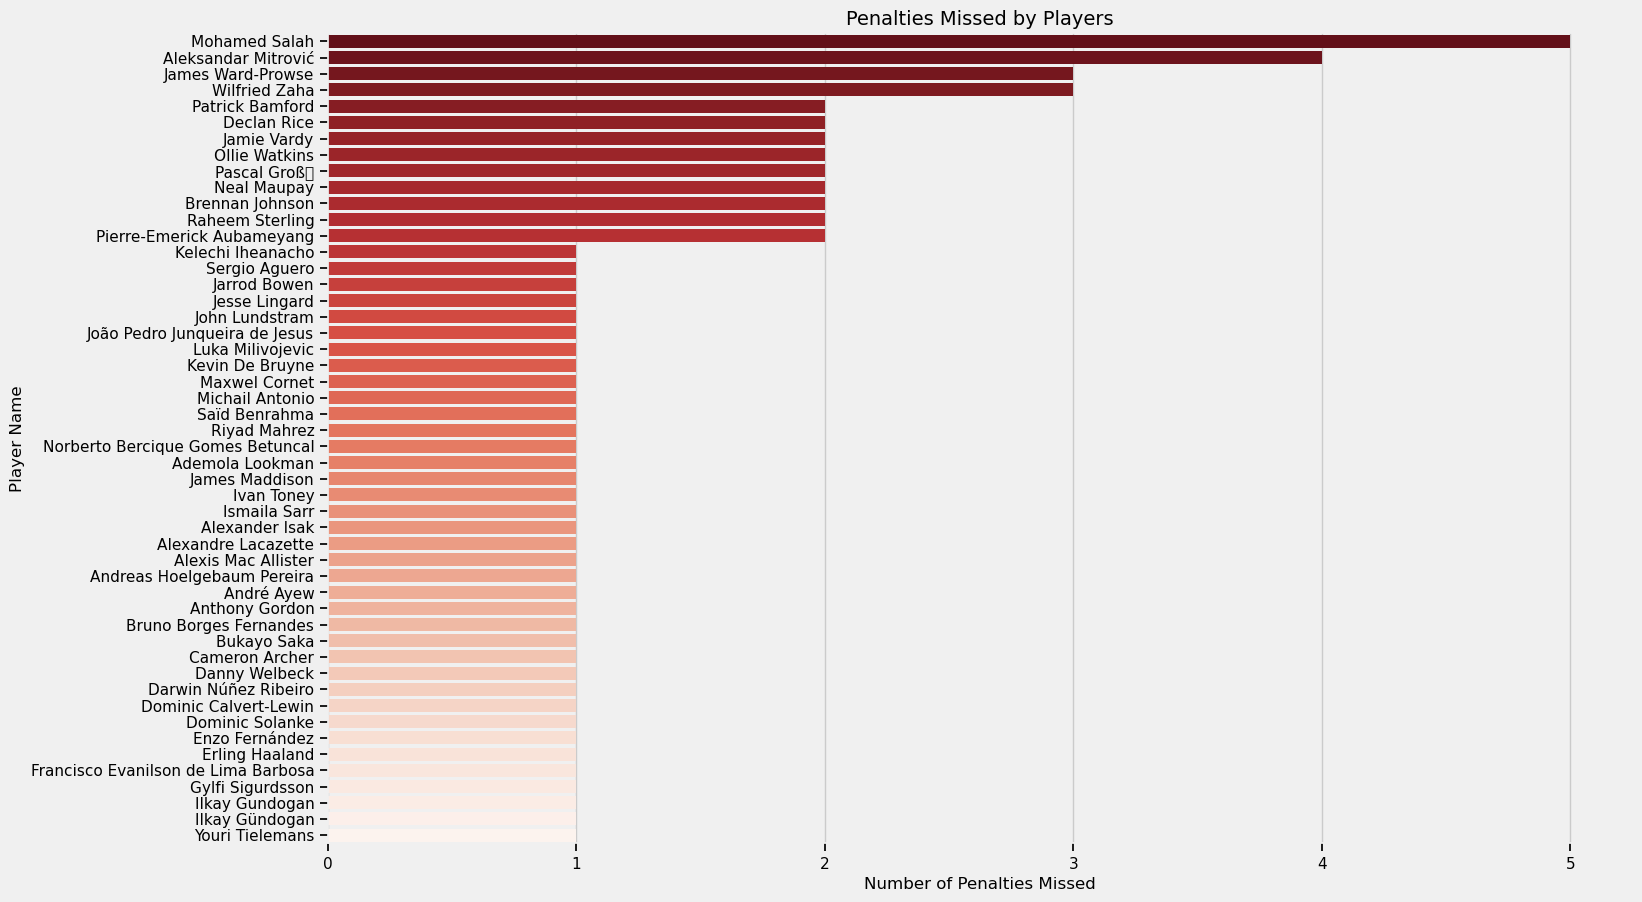

In [78]:
# Group by player and sum the penalties missed
penalty_missed_summary = master_cleaned.groupby('name')['penalties_missed'].sum().reset_index()

# Filter for players who missed at least one penalty
penalty_missed_summary = penalty_missed_summary[penalty_missed_summary['penalties_missed'] > 0]

# Sort by penalties missed
penalty_missed_summary = penalty_missed_summary.sort_values(by='penalties_missed', ascending=False)

# Plotting penalties missed
plt.figure(figsize=(15, 10))
sns.barplot(x='penalties_missed', y='name', data=penalty_missed_summary, palette='Reds_r')
plt.title("Penalties Missed by Players", fontsize=14)
plt.xlabel("Number of Penalties Missed")
plt.ylabel("Player Name")
plt.show()

Players missing penalties experience a drop in total points, yet those who take frequent penalties retain value (e.g., Salah). Red cards have a direct penalty, but their impact depends on the player's scoring consistency before the card.

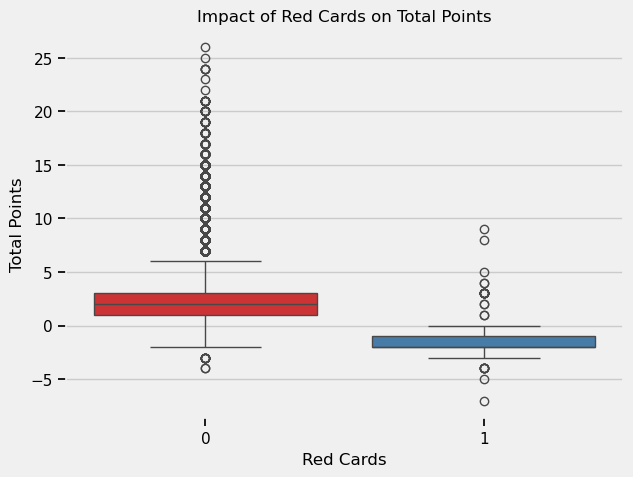

In [79]:
# Red cards impact
sns.boxplot(x='red_cards', y='total_points', data=master_cleaned, palette='Set1')
plt.title("Impact of Red Cards on Total Points")
plt.xlabel("Red Cards")
plt.ylabel("Total Points")
plt.show()

Players receiving a red card (indicated by 1 on the x-axis) have a significantly lower median Total Points compared to those without red cards (indicated by 0).
Unlike penalties missed, red cards appear to have a more consistent and severe impact on fantasy scores.

# Step 6: Multivariate Insights

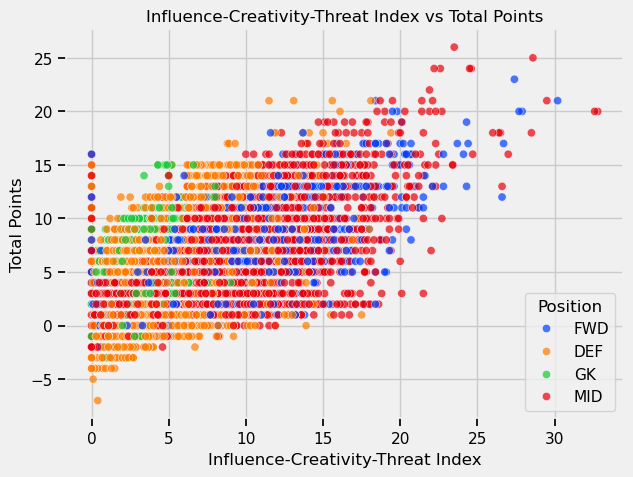

In [80]:
# Influence-Creativity-Threat Index vs Total Points
sns.scatterplot(x='Influence_Creativity_Threat_Index', y='total_points', hue='position', data=master_cleaned, palette='bright', alpha=0.7)
plt.title("Influence-Creativity-Threat Index vs Total Points")
plt.xlabel("Influence-Creativity-Threat Index")
plt.ylabel("Total Points")
plt.legend(title="Position")
plt.show()

There appears to be a positive trend—players with higher.Forward players dominate high threat and total points due to their primary scoring roles. However, midfielders with balanced indices (e.g., De Bruyne) contribute equally to team setups, underlining versatility. Influence-Creativity-Threat Index scores tend to have higher total points. This suggests that the index is a good indicator of player performance. Generally have higher Total Points and higher Influence-Creativity-Threat Index. The plot helps identify which players by position maximize their contributions to scoring points. For example, forwards and attacking midfielders tend to make the most out of their Influence-Creativity-Threat Index.

# Step 7: Home and Away

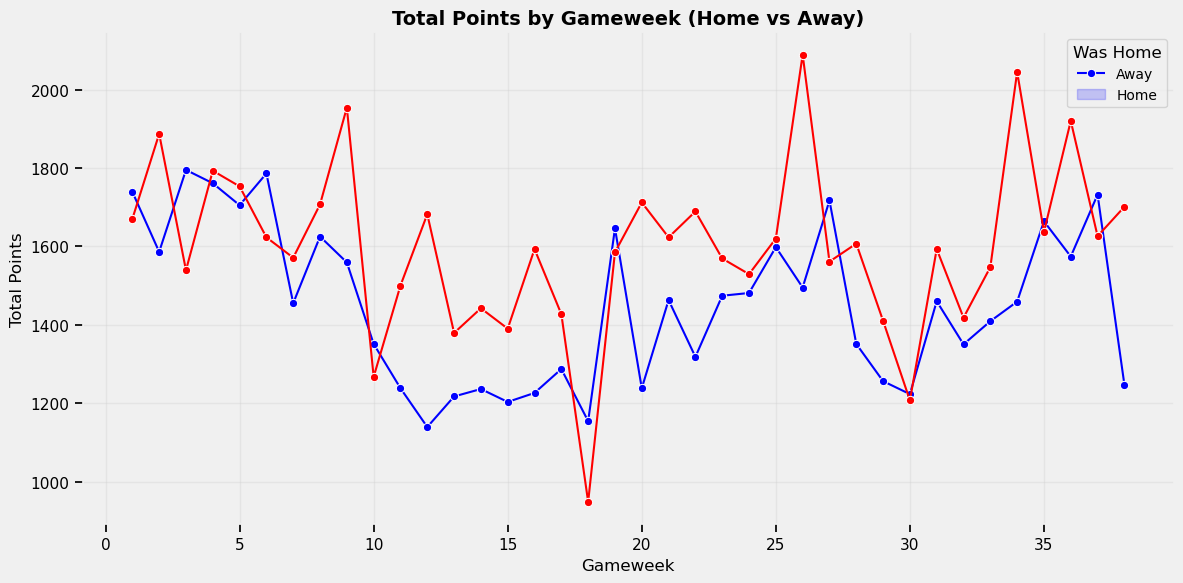

In [81]:
# Calculate total points for home and away games by gameweek
home_away_trend = master_cleaned.groupby(['GW', 'was_home'])['total_points'].sum().reset_index()

# Line plot for total points over gameweeks
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='GW', 
    y='total_points', 
    hue='was_home', 
    data=home_away_trend, 
    palette=['blue', 'red'],
    marker="o"
)
plt.title("Total Points by Gameweek (Home vs Away)", fontsize=14, fontweight='bold')
plt.xlabel("Gameweek", fontsize=12)
plt.ylabel("Total Points", fontsize=12)
plt.legend(title="Was Home", labels=["Away", "Home"], fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

fix legend.

While home performances are consistently stronger, certain gameweeks (e.g., 10 and 25) reveal anomalies, indicating external factors like injuries or tough fixtures.

The red line (Away) and the blue line (Home) compare the total points scored in each gameweek for home and away matches.
The fluctuations suggest variability in performance across gameweeks, with some weeks favoring home teams and others favoring away teams.

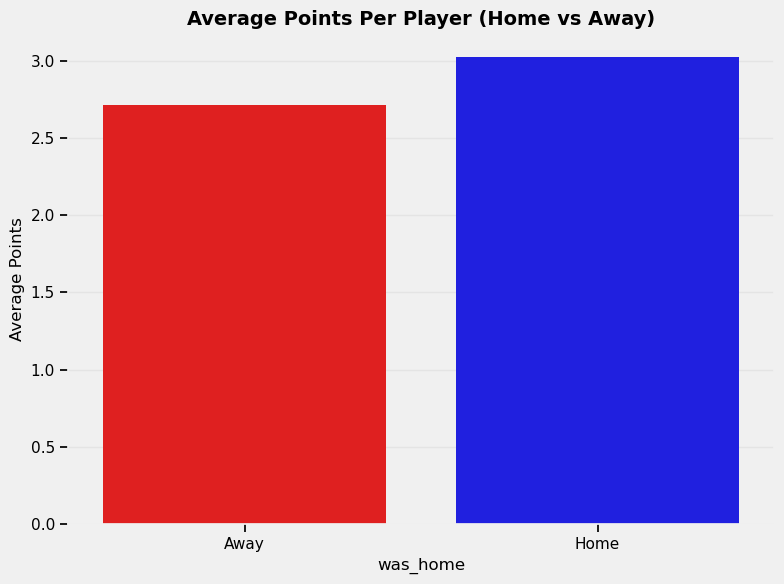

In [82]:
# Calculate average points per player for home and away matches
avg_points_home_away = master_cleaned.groupby('was_home')['total_points'].mean().reset_index()

# Bar plot for average points per player
plt.figure(figsize=(8, 6))
sns.barplot(
    x='was_home', 
    y='total_points', 
    data=avg_points_home_away, 
    palette=['red', 'blue']
)
plt.title("Average Points Per Player (Home vs Away)", fontsize=14, fontweight='bold')
plt.ylabel("Average Points", fontsize=12)
plt.xticks([0, 1], ["Away", "Home"])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Players score more average points at home (blue) than away (red).
This reinforces the general observation that players tend to perform better at home.

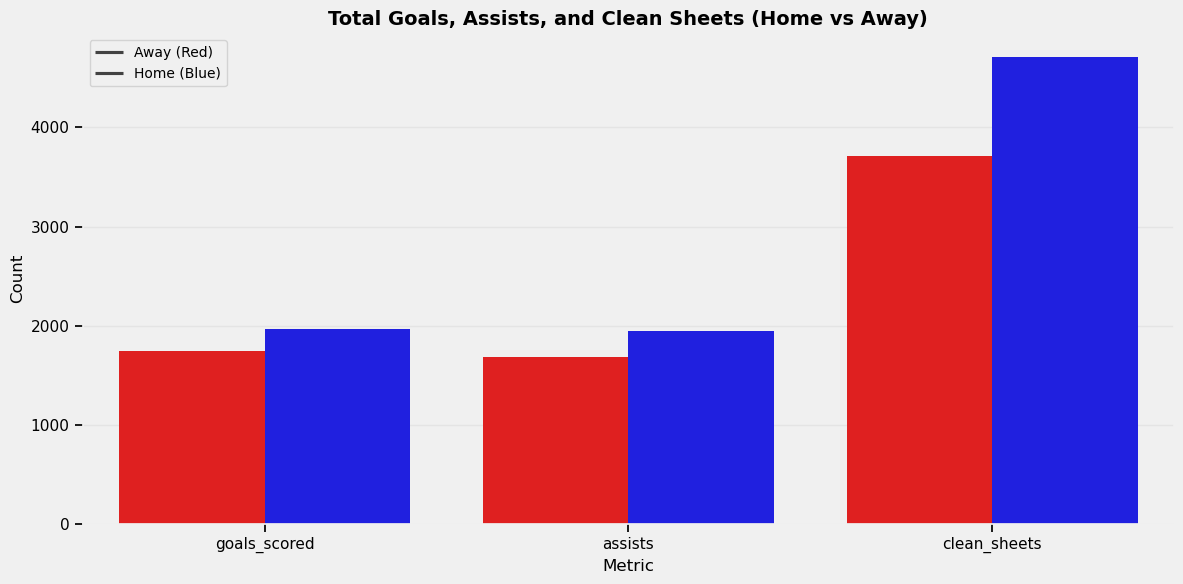

In [83]:
# Calculate total goals, assists, and clean sheets for home and away games
metrics_home_away = master_cleaned.groupby('was_home')[['goals_scored', 'assists', 'clean_sheets']].sum().reset_index()

# Bar plot for total metrics
metrics_home_away_melted = metrics_home_away.melt(id_vars='was_home', var_name='Metric', value_name='Count')

# Explicit labeling with custom legend
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Metric', 
    y='Count', 
    hue='was_home', 
    data=metrics_home_away_melted, 
    palette=['red', 'blue']
)

# Add plot enhancements
plt.title("Total Goals, Assists, and Clean Sheets (Home vs Away)", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.legend(
    labels=["Away (Red)", "Home (Blue)"],
    fontsize=10, 
    title_fontsize=12
)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Home matches outperform away matches in all three metrics: goals scored, assists, and clean sheets.

The largest difference is observed in clean sheets, suggesting stronger defensive performances at home.

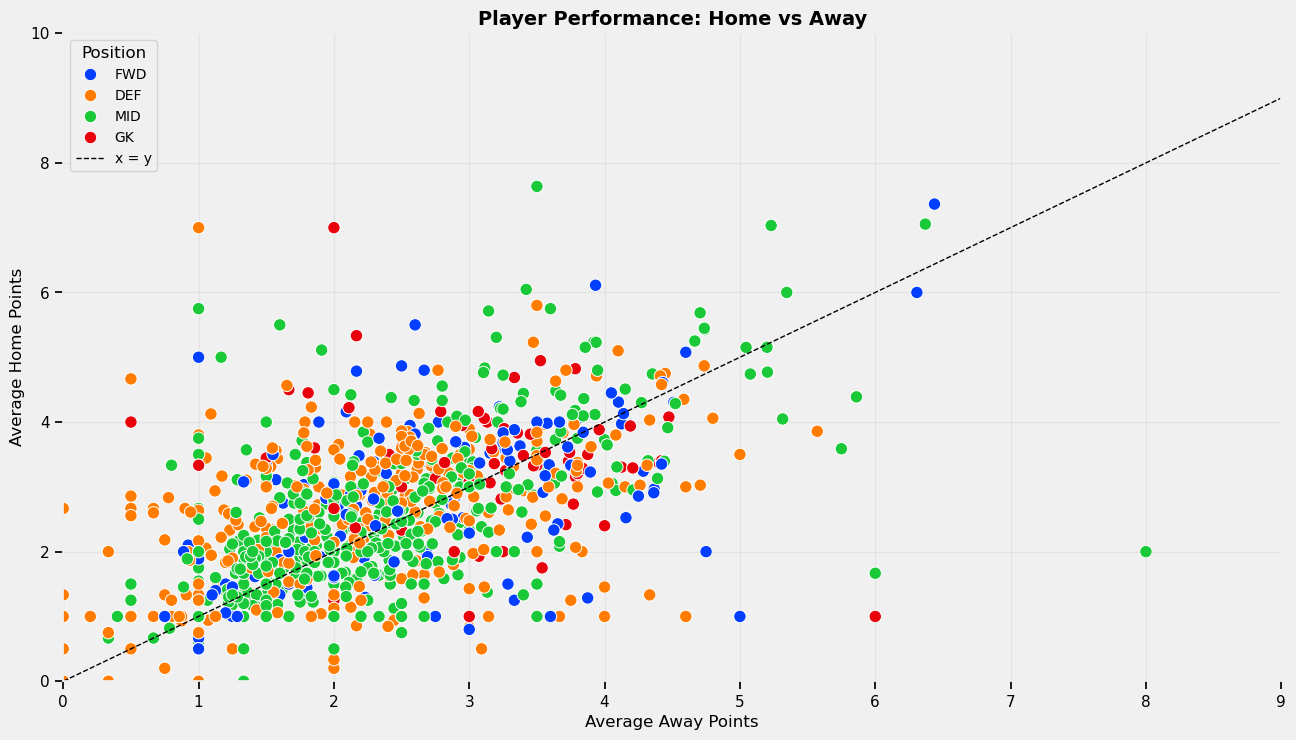

In [102]:
# Aggregate data to calculate average points for each player
player_comparison_filtered = player_comparison_filtered.groupby(['name', 'position']).agg({
    'Away Points': 'mean',
    'Home Points': 'mean'
}).reset_index()

# Plotting the scatter plot with hue based on player position
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='Away Points', 
    y='Home Points', 
    hue='position', 
    data=player_comparison_filtered, 
    edgecolor="w", 
    s=80,
    palette="bright"
)

# Add a reference line for x = y
max_value = player_comparison_filtered[['Away Points', 'Home Points']].max().max()
plt.plot(
    [0, max_value], 
    [0, max_value], 
    'k--', linewidth=1, label="x = y"
)

# Add plot enhancements
plt.title("Player Performance: Home vs Away", fontsize=14, fontweight='bold')
plt.xlabel("Average Away Points", fontsize=12)
plt.ylabel("Average Home Points", fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(0, player_comparison_filtered['Away Points'].max() + 1)
plt.ylim(0, player_comparison_filtered['Home Points'].max() + 1)
plt.legend(title="Position", fontsize=10)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


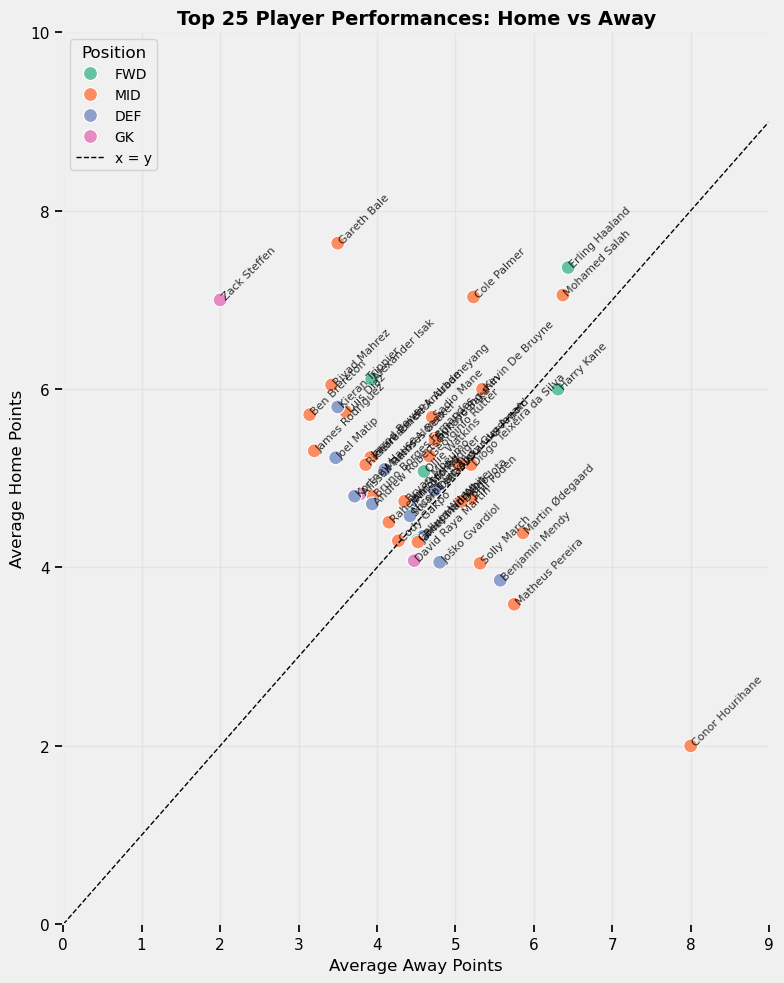

In [99]:
# Calculate Home Points and Away Points based on 'was_home'
home_points = master_cleaned[master_cleaned['was_home'] == True].groupby(['name', 'position']).agg({
    'total_points': 'mean'
}).rename(columns={'total_points': 'Home Points'})

away_points = master_cleaned[master_cleaned['was_home'] == False].groupby(['name', 'position']).agg({
    'total_points': 'mean'
}).rename(columns={'total_points': 'Away Points'})

# Merge Home and Away Points
player_comparison_filtered = home_points.merge(away_points, on=['name', 'position'], how='outer').reset_index()

# Calculate Total Points (sum of average Home and Away Points)
player_comparison_filtered['Total Points'] = (
    player_comparison_filtered['Home Points'].fillna(0) + 
    player_comparison_filtered['Away Points'].fillna(0)
)

# Sort by Total Points and filter the top 50 players
top_25_players = player_comparison_filtered.sort_values(by='Total Points', ascending=False).head(50)

# Plotting the scatter plot with hue based on player position
plt.figure(figsize=(8, 10))
sns.scatterplot(
    x='Away Points', 
    y='Home Points', 
    hue='position', 
    data=top_25_players, 
    edgecolor="w", 
    s=100,
    palette="Set2"
)

# Add a reference line for x = y
max_value = top_25_players[['Away Points', 'Home Points']].max().max()
plt.plot(
    [0, max_value], 
    [0, max_value], 
    'k--', linewidth=1, label="x = y"
)

# Annotate players' names
for _, row in top_25_players.iterrows():
    plt.text(
        row['Away Points'], 
        row['Home Points'], 
        row['name'], 
        fontsize=8, 
        alpha=0.8,
        rotation=45
    )

# Add plot enhancements
plt.title("Top 25 Player Performances: Home vs Away", fontsize=14, fontweight='bold')
plt.xlabel("Average Away Points", fontsize=12)
plt.ylabel("Average Home Points", fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(0, top_50_players['Away Points'].max() + 1)
plt.ylim(0, top_50_players['Home Points'].max() + 1)
plt.legend(title="Position", fontsize=10)
plt.tight_layout()
plt.show()

Gareth Bale and Zack Steffen show exceptionally strong home performance relative to their away stats. Players closer to the diagonal line (e.g. Harry Kane) demonstrate balanced performance across home and away matches. Teams could leverage this data to select players for specific matches. For instance, away matches might require players like Hourihane, while home matches could benefit from players like Bale.

# Step X: Specific Player Analysis

These plots set the stage by showing overall trends including high-performing players and how positions contribute differently to total points.

# Top players by total points

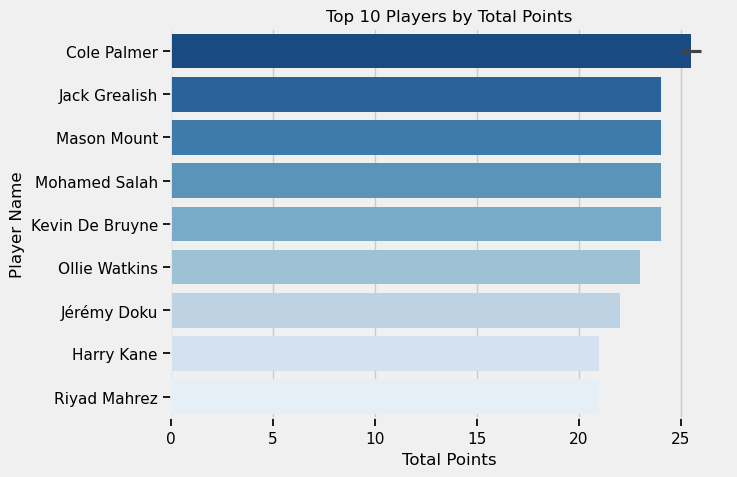

In [105]:
top_players = master_cleaned.nlargest(10, 'total_points')
sns.barplot(x='total_points', y='name', data=top_players, palette='Blues_r')
plt.title("Top 10 Players by Total Points")
plt.xlabel("Total Points")
plt.ylabel("Player Name")
plt.show()

This chart highlights the top performers in terms of total points, with Cole Palmer, Jack Grealish, and Mason Mount leading the list. These players are likely to have consistent performance across matches or occasional impressive performances. The ranking provides insight for team selection, especially for fantasy leagues, by identifying players who contribute the most points.

# Outcome